In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
df_tsi = pd.read_csv (r'C:\devsbb\ROTH_AND_JOOS_CP2013.dat',comment='#', header=None, delimiter="\s+",usecols=[0,5]).rename(columns = {0 : "year", 5 : "TSI"})

<AxesSubplot:xlabel='year'>

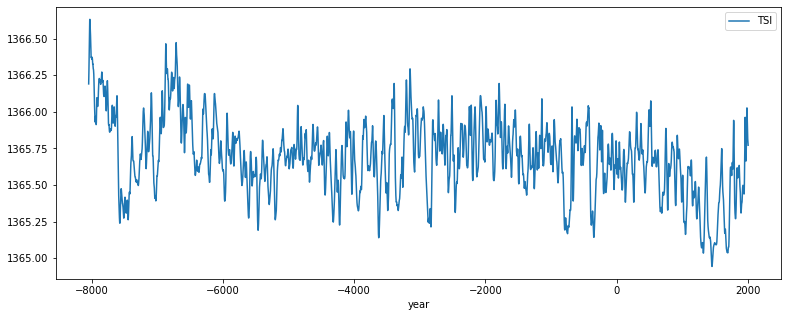

In [5]:
df_tsi.plot(x= "year", y = "TSI",figsize=(13,5))

<AxesSubplot:xlabel='year'>

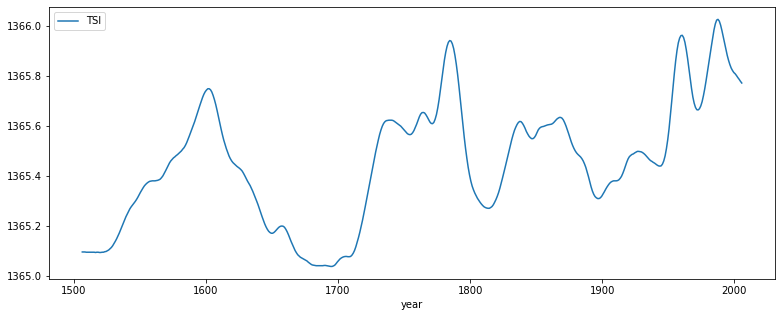

In [6]:
# letzte 500 Jahre
df_tsi[-500:].plot(x= "year", y = "TSI",figsize=(13,5))

## Prophet

In [7]:
df_fb = df_tsi[df_tsi.year>1800]

In [8]:
df_fb['date'] = df_fb['year'].apply(lambda x : int(x)).apply(str)

C:\Users\U230261\AppData\Local\Temp/ipykernel_13852/589847383.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
df_fb['date'] = pd.to_datetime(df_fb['date'].astype(str), format = "%Y") + pd.DateOffset(months = 6)

C:\Users\U230261\AppData\Local\Temp/ipykernel_13852/242123643.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
df_fb.columns = ['year', 'y', 'ds']

In [11]:
df_fb

,year,y,ds
9851,1800.5,1365.379,1800-07-01
9852,1801.5,1365.359,1801-07-01
9853,1802.5,1365.344,1802-07-01
9854,1803.5,1365.331,1803-07-01
9855,1804.5,1365.320,1804-07-01
...,...,...,...
10052,2001.5,1365.802,2001-07-01
10053,2002.5,1365.794,2002-07-01
10054,2003.5,1365.787,2003-07-01
10055,2004.5,1365.779,2004-07-01


In [12]:
from fbprophet import Prophet

In [13]:
#df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df_fb)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = df_fb[df_fb.ds > "1990-07-01"]

          ds         yhat   yhat_lower   yhat_upper
0 1991-07-01  1365.857320  1365.769813  1365.946602
1 1992-07-01  1365.854358  1365.762343  1365.938321
2 1993-07-01  1365.857498  1365.773418  1365.944856
3 1994-07-01  1365.860956  1365.775588  1365.949667
4 1995-07-01  1365.864726  1365.771707  1365.949841


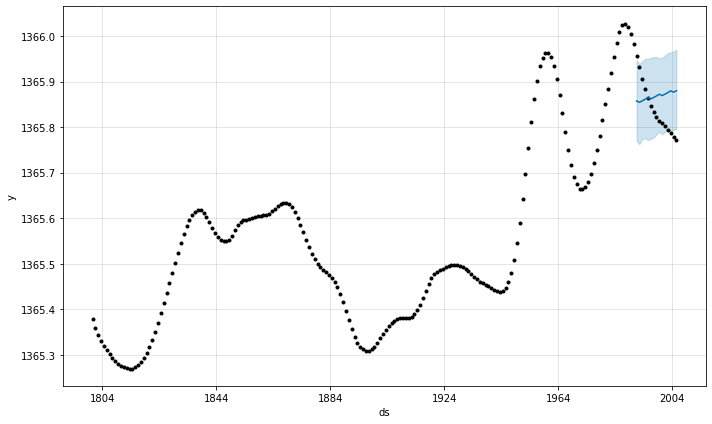

In [15]:
from matplotlib import pyplot
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()